In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv("tips.csv", sep=",")
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='size'>

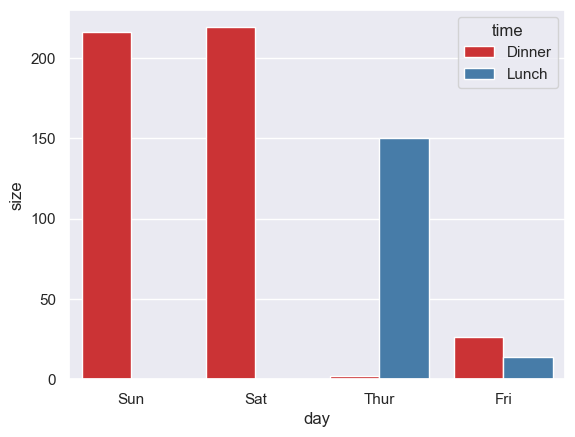

In [16]:
# по умолчанию estimator="mean"
# errorbar= None убирает черные черточки

sns.barplot(x="day", y="size", hue="time", palette="Set1", data=df, estimator=sum,
           errorbar= None)

In [20]:
grp = df.groupby(["day", "time"]).sum().reset_index()
grp.head()

,day,time,total_bill,tip,size
0,Fri,Dinner,235.96,35.28,26
1,Fri,Lunch,89.92,16.68,14
2,Sat,Dinner,1778.40,260.40,219
3,Sun,Dinner,1627.16,247.39,216
4,Thur,Dinner,18.78,3.00,2


<Axes: xlabel='day', ylabel='size'>

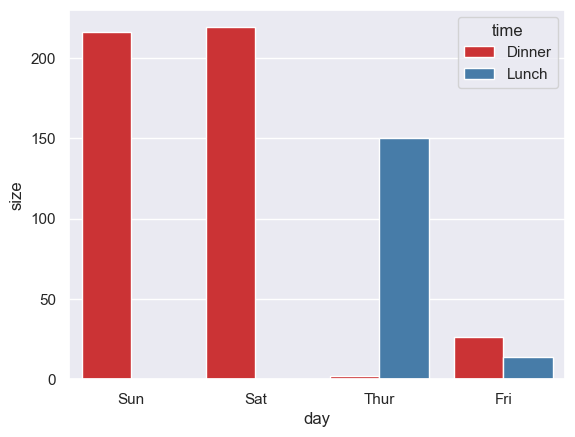

In [30]:
sns.barplot(x="day", y="size", hue="time", palette="Set1", data=df, estimator=np.sum,
           errorbar= None)

<Axes: xlabel='day', ylabel='count'>

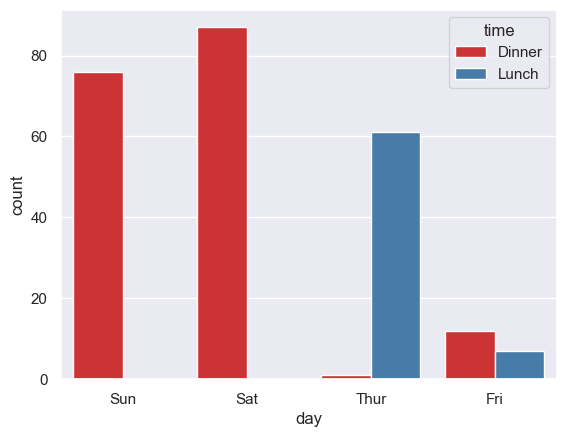

In [61]:
# на мой взгляд здесь он использует count и не учитывает количество посестителей поэтому это хуйня!
sns.countplot(x="day", hue="time", palette="Set1", data=df)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# агрегируем данные
agg_df = df.groupby(["day", "time"], as_index=False)["size"].sum()

# преобразуем в сводную таблицу для stackplot
pivot_df = agg_df.pivot(index="day", columns="time", values="size").fillna(0)
pivot_df.head(5)

time,Dinner,Lunch
day,,
Fri,26.0,14.0
Sat,219.0,0.0
Sun,216.0,0.0
Thur,2.0,150.0


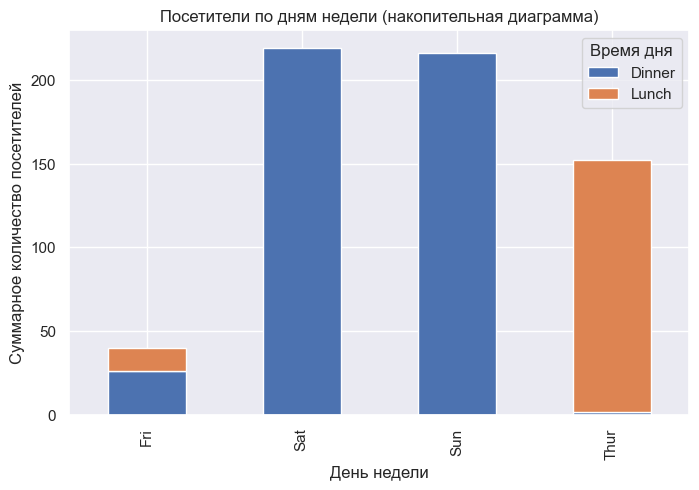

In [37]:
# строим stacked bar
pivot_df.plot(kind="bar", stacked=True, figsize=(8,5))

plt.ylabel("Суммарное количество посетителей")
plt.xlabel("День недели")
plt.title("Посетители по дням недели (накопительная диаграмма)")
plt.legend(title="Время дня")
plt.show()

In [53]:
grp = df.groupby(["size", "sex"]).count().reset_index()
grp.rename(columns={"total_bill":"count"}, inplace=True)
grp.head(5)

,size,sex,count,tip,smoker,day,time
0,1,Female,3,3,3,3,3
1,1,Male,1,1,1,1,1
2,2,Female,58,58,58,58,58
3,2,Male,98,98,98,98,98
4,3,Female,14,14,14,14,14


<Axes: xlabel='size'>

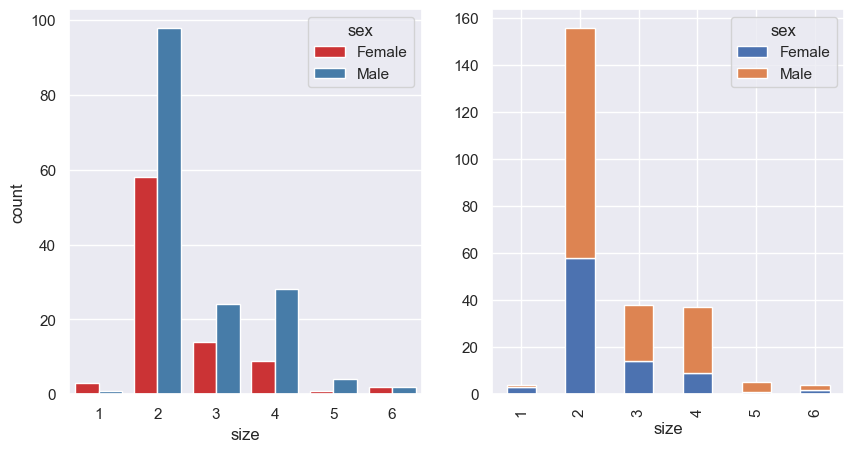

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x="size", y="count", hue="sex", palette="Set1", data=grp, ax=ax[0])

pivot_df = grp.pivot(index="size", columns="sex", values="count").fillna(0)
pivot_df.plot(kind="bar", stacked=True, ax=ax[1])